In [3]:
import pandas as pd
df = pd.read_csv('./Joules_of_Siam_Data - Dataset_1.csv')
df.head()

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832


In [5]:
df.rename(columns={'Population (Million persons)':'Population', 'GDP Chain volume measures (billion baht)': 'GDP'}, inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler

#2. create the object
sc = StandardScaler()

#3. fit and transform
standardized_data = sc.fit_transform(df[['Population','GDP','Temperature', 'Rainfall']])

In [7]:
from sklearn.model_selection import train_test_split
X = standardized_data
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=999)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 4), (9, 4), (12,), (9,))

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9720988617389086

In [13]:
lr.intercept_

155328.58172179107

In [10]:
lr.coef_

array([-1129.07885223, 30992.51714569,  -859.98851671,   566.03449498])

<AxesSubplot:>

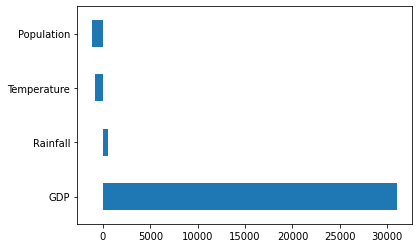

In [18]:
import seaborn as sns
pd.Series(lr.coef_, index=['Population','GDP','Temperature', 'Rainfall']).nlargest(4).plot(kind='barh')

In [16]:
temp = pd.DataFrame(lr.coef_)

,0
0,-1129.078852
1,30992.517146
2,-859.988517
3,566.034495


In [11]:
yhat = lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

MSE  = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, yhat)

MSE, RMSE, MAE

(16290479.347447505, 4036.1465963772307, 3528.9786766375796)

In [ ]:
import matplotlib.pyplot
